# Group 12: Insight Innovators
# Topic: Heart Disease Prediction
## Goal: To predict presence of heart disease using patient attributes

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wns
wns.filterwarnings("ignore")

# Libraries for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # To check models accuracy
from sklearn.model_selection import GridSearchCV

# Libraries for interpreting model predictions
import shap
import joblib # To save the model

In [2]:
# Loading dataset
df = pd.read_csv(r"heart.csv")

## Exploratory Data Analysis (EDA)

In [3]:
# This shows the First 5 & last 5 rows
display(df.head())
display(df.tail())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
# This shows the number of rows and columns of the dataset
df.shape

(1025, 14)

- The dataset has 1025 **rows** and 14 **columns**

In [5]:
# This shows the datatypes and null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- The dataset contains 14 columns of **13 int** data type and **1 float** data type, hence all **numerical values**.
- The dataset contains **zero(0) null values**.

In [6]:
# Statistics for dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Missng and Duplicated Values

In [7]:
# Missing value counts
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- No missing values in our dataset.

In [8]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Total duplicate rows detected: {num_duplicates}")

Total duplicate rows detected: 723


#### Handling Duplicates

In [9]:
# Investigating and viewing duplicates before removing
df[df.duplicated()].sort_values(by=list(df.columns)).head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
501,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
841,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
846,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [10]:
# Removing exact duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# New shape of datafarme after duplicate handling
print(f"\nAction: Removed exact duplicates to ensure data integrity.")
print(f"Final dataset shape: {df.shape}")


Action: Removed exact duplicates to ensure data integrity.
Final dataset shape: (302, 14)


#### Summary
- **Why did we consider removing duplicates?:** Duplicates can bias analysis, especially if the dataset includes repeated patient records. Even if they look identical, they may artificially inflate counts and correlations.
- **How did we ascertain they are duplicates?:** We explored the duplicate rows to see if they are the same across all attritubes, most especially the target.
- **Action:** Duplicates removed!

### Outlier Detection and Handling

In [12]:
# Detect outliers using interquartile range(IQR) 
def detect_outliers_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    num_outliers = outliers.shape[0]
    
    if num_outliers > 0:
        print(f"{col}: {num_outliers} potential outliers")

for col in df.columns:
    detect_outliers_IQR(df, col)

trestbps: 9 potential outliers
chol: 5 potential outliers
fbs: 45 potential outliers
thalach: 1 potential outliers
oldpeak: 5 potential outliers
ca: 24 potential outliers
thal: 2 potential outliers


#### Visualizing the outliers using Boxplots

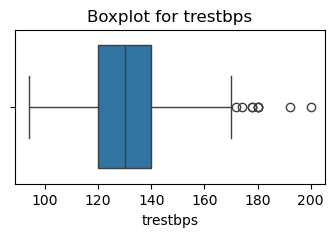

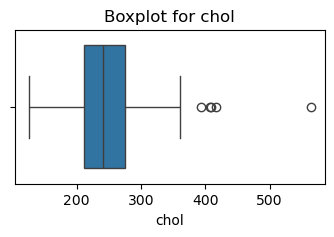

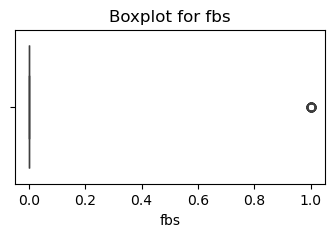

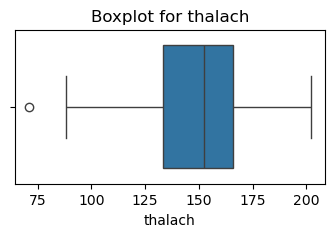

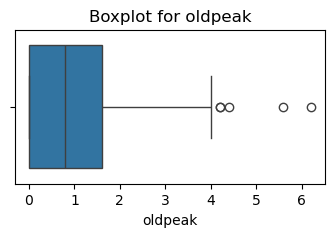

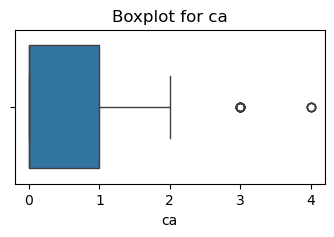

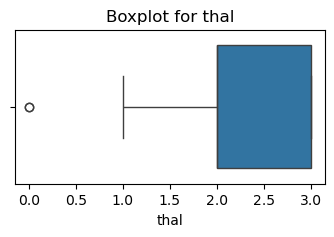

In [13]:
for col in ['trestbps','chol','fbs','thalach','oldpeak','ca','thal']:
    plt.figure(figsize= (4, 2))
    sns.boxplot(data= df, x= col)
    plt.title(f"Boxplot for {col}")
    plt.grid(False)
    plt.show()

### Treating Outliers Without Dropping Rows

- We have lost too many data from dropping duplicates, hence we transform our data to treat outliers rather than dropping them.
- This approach:
    - Keeps dataset size intact
    - Reduces skewness
    - Keeps extreme but valid medical readings reasonable

#### Transformation for Outliers using Log / Sqrt 

**NB**
- fbs (fasting blood sugar) and ca (number of vessels) are categorical-like numerics with discrete small integers hence we should not transform them.
- So we’ll apply transformations to:
['trestbps', 'chol', 'thalach', 'oldpeak', 'thal']

##### Inspecting Skewness of attributes with outliers

In [14]:
df[['trestbps','chol','thalach','oldpeak','thal']].skew()

trestbps    0.716541
chol        1.147332
thalach    -0.532671
oldpeak     1.266173
thal       -0.481232
dtype: float64

- trestbps    0.716541 is right skewed
- chol        1.147332 is right skewed
- thalach    -0.532671 is left skewed
- oldpeak     1.266173 is right skewed
- thal       -0.481232 is left skewed

##### Applying Log and Sqrt transformations

In [15]:
# Log transformation
df['trestbps_log'] = np.log1p(df['trestbps'])
df['chol_log'] = np.log1p(df['chol'])
df['thalach_log'] = np.log1p(df['thalach'])
df['oldpeak_log'] = np.log1p(df['oldpeak'] + 1) 
# df['oldpeak_log'] = np.log1p(df['oldpeak'] + abs(df['oldpeak'].min()) + 1) 
df['thal_log'] = np.log1p(df['thal'])

# Square root transformation 
df['trestbps_sqrt'] = np.sqrt(df['trestbps'])
df['chol_sqrt'] = np.sqrt(df['chol'])
df['thalach_sqrt'] = np.sqrt(df['thalach'])
df['oldpeak_sqrt'] = np.sqrt(df['oldpeak'] + abs(df['oldpeak'].min()) + 1)
df['thal_sqrt'] = np.sqrt(df['thal'])

##### Comparing the Original with Log-Transformed and Sqrt-Transformed

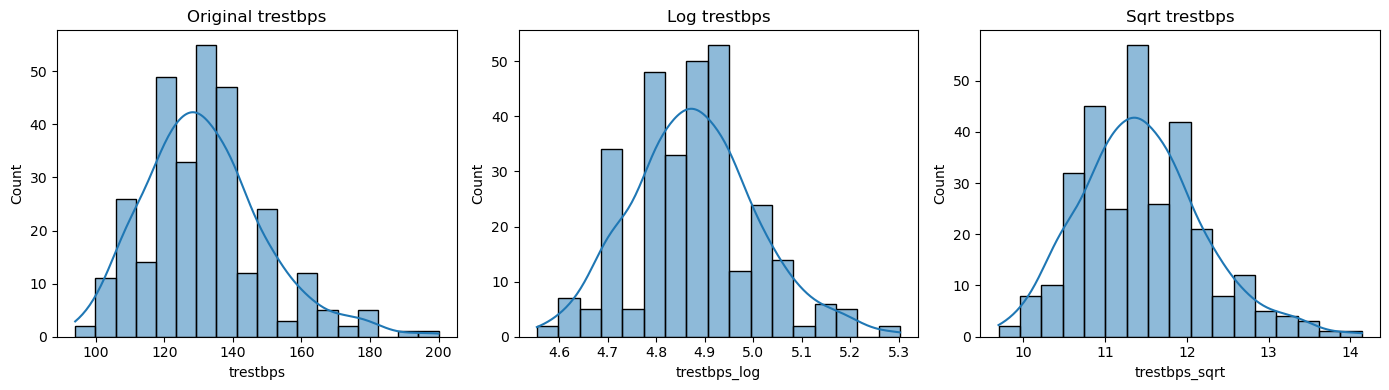

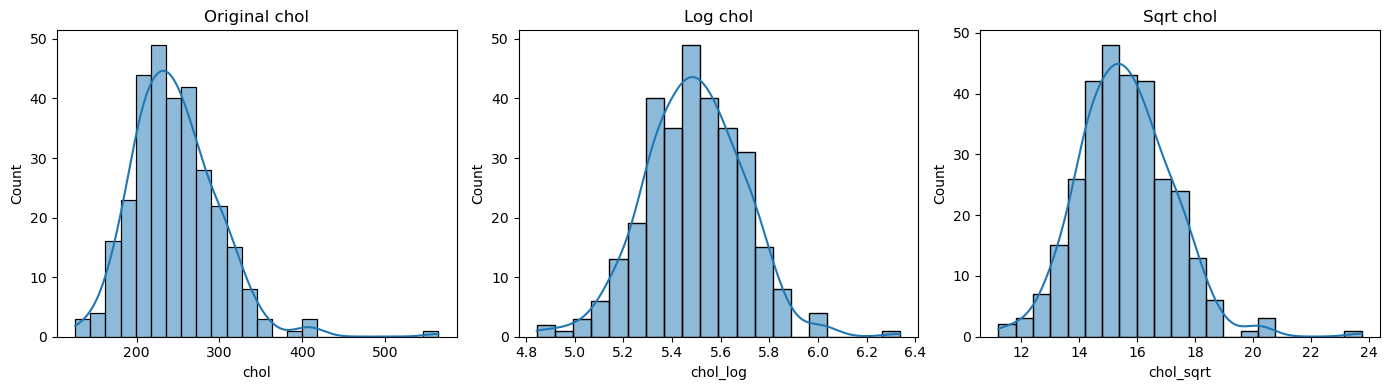

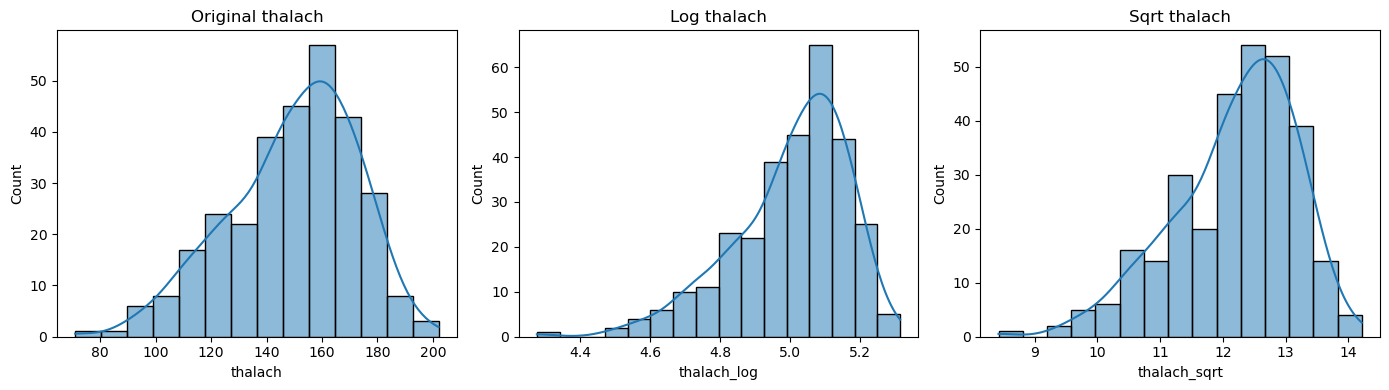

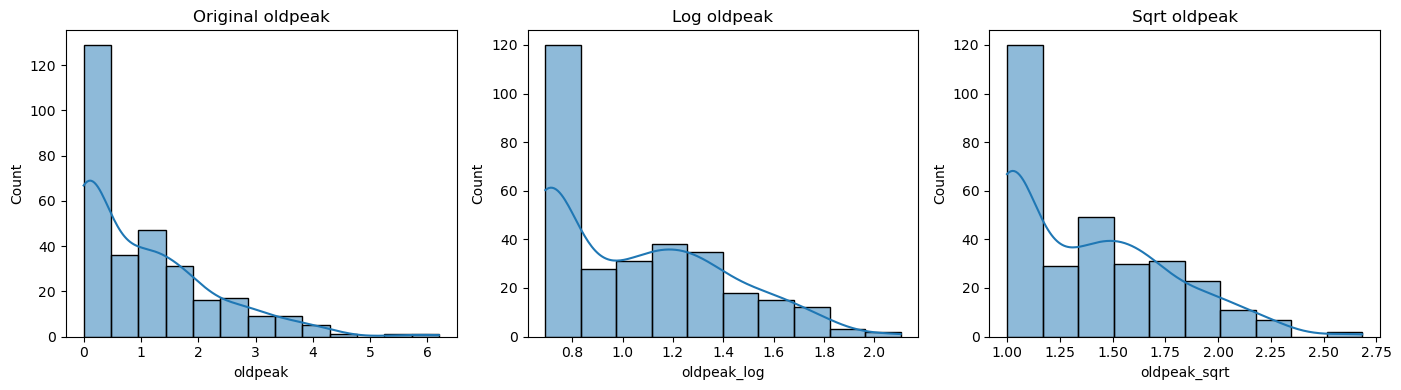

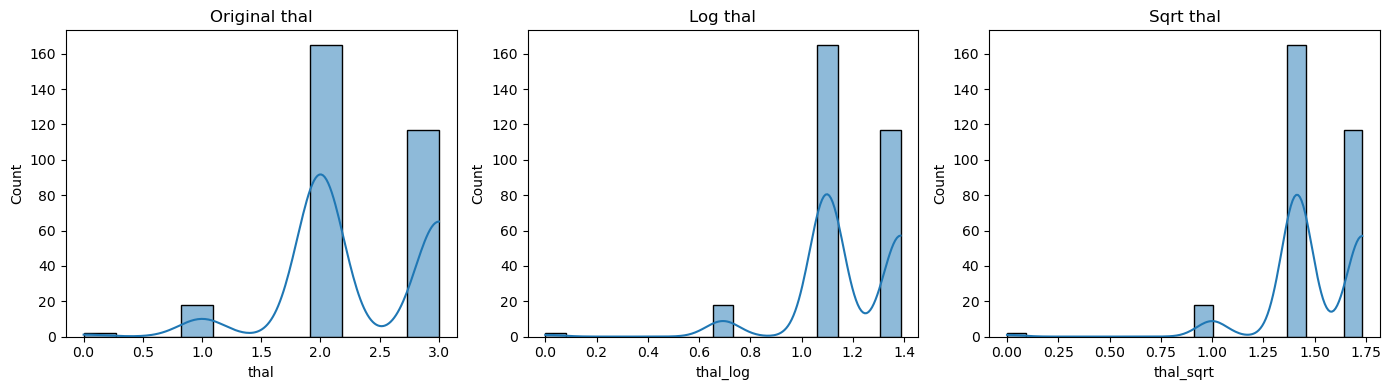

In [16]:
cols_to_plot = ['trestbps', 'chol', 'thalach', 'oldpeak', 'thal']

for col in cols_to_plot:
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Original {col}')

    sns.histplot(df[f'{col}_log'], kde=True, ax=axes[1])
    axes[1].set_title(f'Log {col}')

    sns.histplot(df[f'{col}_sqrt'], kde=True, ax=axes[2])
    axes[2].set_title(f'Sqrt {col}')

    plt.tight_layout()
    plt.show()

- From our observation, log-transformed histogram looks smoother and more bell-shaped than square_root-transformed histogram.hence we are using log-transformed.

#### Comparing the Original and Log-Transformed using boxplot and skewness

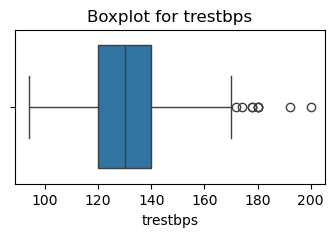

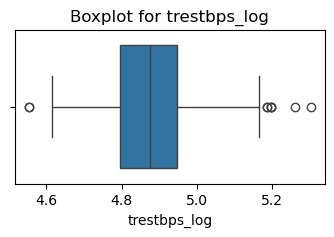

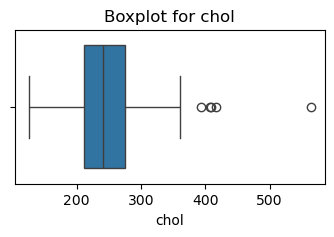

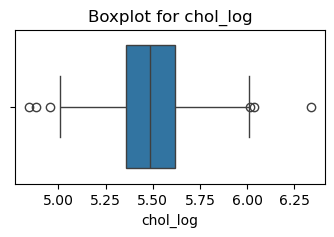

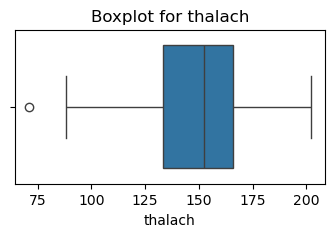

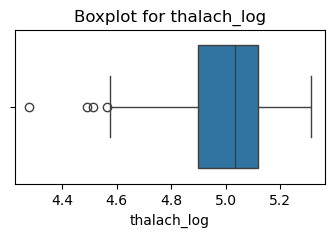

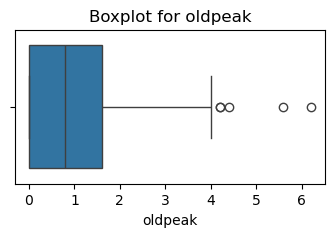

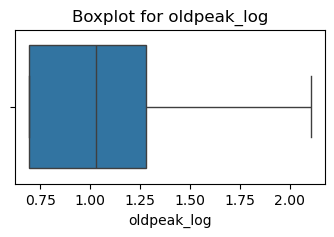

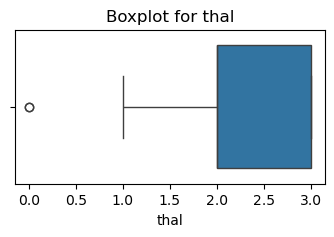

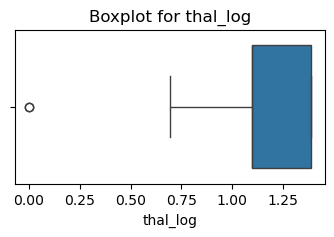

In [17]:
for col in ['trestbps','trestbps_log','chol','chol_log','thalach','thalach_log','oldpeak','oldpeak_log','thal','thal_log']:
    plt.figure(figsize= (4, 2))
    sns.boxplot(data= df, x= col)
    plt.title(f"Boxplot for {col}")
    plt.grid(False)
    plt.show()

In [18]:
# Skewness of original and lo-transformed columns
df[['trestbps','chol','thalach','oldpeak','thal','trestbps_log','chol_log','thalach_log','oldpeak_log','thal_log']].skew()

trestbps        0.716541
chol            1.147332
thalach        -0.532671
oldpeak         1.266173
thal           -0.481232
trestbps_log    0.288650
chol_log        0.088562
thalach_log    -0.991543
oldpeak_log     0.604857
thal_log       -1.605770
dtype: float64

##### Exceptions to outliers
- Even after applying log-tranformation, the outliers of these columns were not removed because they are true cases like that (not necessarily errors).

##### Exemption from tranformation
- Since the log-transformed skewness for 'thalach' and 'thal' are excessively high, we as well go with the original data because it is skewness is within the threshold of **-o.5 and 0.5** which is a common goal to consider a data approximately symmetric.

#### Correlation Stability After Transformation

In [19]:
# Choosing our numeric features (original vs log-transformed)
log_features = ['trestbps_log', 'chol_log', 'thalach_log', 'oldpeak_log', 'thal_log']
original_features = ['trestbps', 'chol', 'thalach', 'oldpeak', 'thal']

# Comparing correlations with target
print("=== Correlation of Original Features with Target ===")
display(df[original_features + ['target']].corr()['target'].sort_values(ascending=False))

print("\n=== Correlation of Log-Transformed Features with Target ===")
display(df[log_features + ['target']].corr()['target'].sort_values(ascending=False))

=== Correlation of Original Features with Target ===


target      1.000000
thalach     0.419955
chol       -0.081437
trestbps   -0.146269
thal       -0.343101
oldpeak    -0.429146
Name: target, dtype: float64


=== Correlation of Log-Transformed Features with Target ===


target          1.000000
thalach_log     0.411755
chol_log       -0.088572
trestbps_log   -0.143931
thal_log       -0.274175
oldpeak_log    -0.434107
Name: target, dtype: float64

- We will note that our correlations are roughly similar or sligghtly stronger after transformation, it means the log transformation preserved relationships with the target variable.

### Univariate & Bivariate Analysis

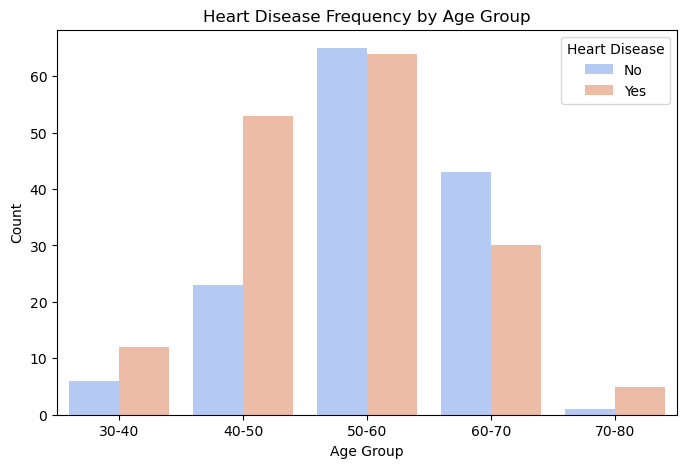

In [20]:
# Create custom age bands (based on medical relevance)
df['age_group'] = pd.cut(df['age'], 
                         bins=[28, 40, 50, 60, 70, 80],
                         labels=['30-40', '40-50', '50-60', '60-70', '70-80'])
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='age_group', hue='target', palette='coolwarm')
plt.title("Heart Disease Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

- Heart disease frequency tends to rise in older age groups (50–70), tends to drop after 70 .

- Younger groups show fewer cases which is consistent with medical expectations.

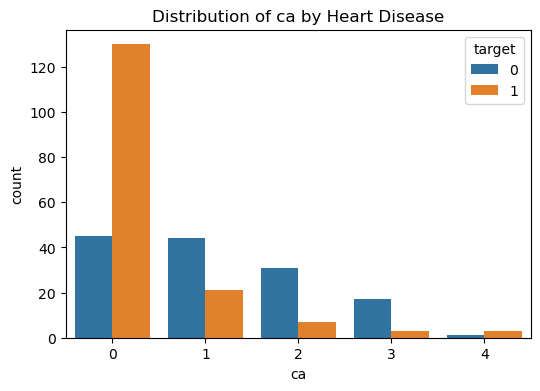

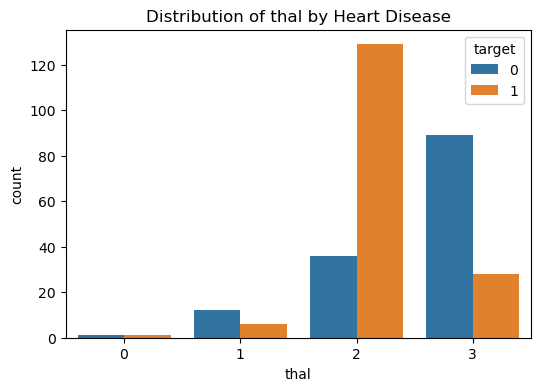

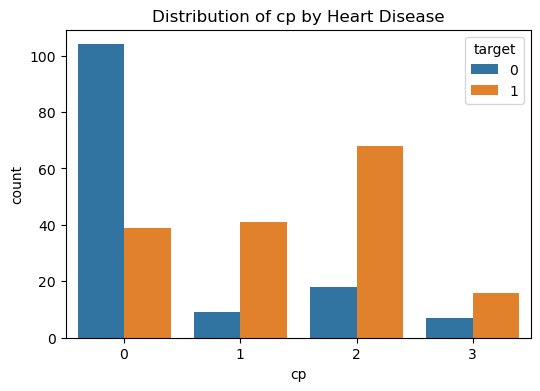

In [21]:
# Count of ca(major vessels) and thal(Thalassemia) with target
for col in ['ca', 'thal', 'cp']:
    plt.figure(figsize= (6, 4))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.show()

- chest pain type condition **1 and 2** has more positive heart disease patient despite being lower in population than the chest pain type condition **1**, while chest pain type condition **3** has the lowest positive heart disease patients.

#### Comparing gender population with target

,sex,count,target,percentage
0,1,206,92,44.660194
1,0,96,72,75.000000


<Axes: xlabel='sex', ylabel='count'>

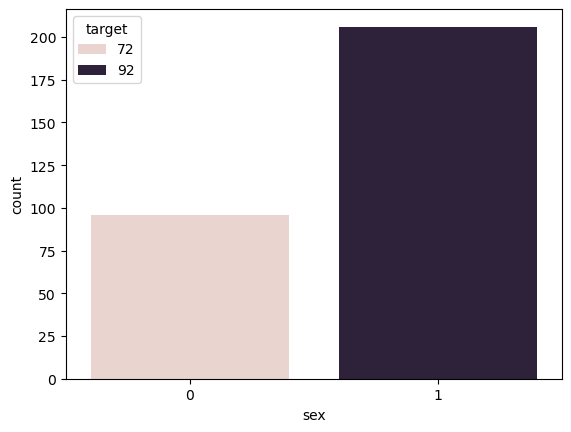

In [22]:
gender_count = df["sex"].value_counts()
gender_positive_count = df.groupby("sex")["target"].sum()
sex_count_tar = pd.merge(gender_count,gender_positive_count, on= "sex", how="inner").reset_index()
sex_count_tar["percentage"] = (sex_count_tar["target"] / sex_count_tar["count"]) * 100
display(sex_count_tar)

sns.barplot(data = sex_count_tar, y = "count", x = "sex", hue="target")

- The table shows men are most likely having the disease than women comparing the original population with the postive population.

#### How does chest pain type vary between male and female?

,cp,sex,count
0,0,female,39
1,0,male,104
2,1,female,18
3,1,male,32
4,2,female,35
5,2,male,51
6,3,female,4
7,3,male,19


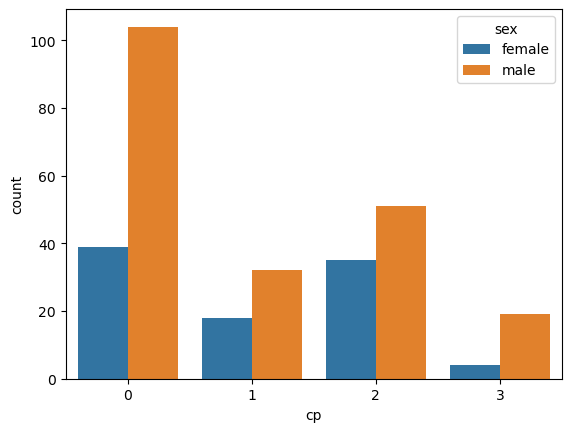

In [23]:
gender_cp = df.groupby(["cp", "sex"]).size().reset_index(name = "count")
gender_cp["sex"]=gender_cp["sex"].replace({0:"female", 1:"male"})  # use the real gender name for clearer understanding
display(gender_cp)

sns.barplot(data = gender_cp, x = "cp", y = "count", hue= "sex" )
plt.show()

- Across all the chest pain, male patient are dominant than the female patient

#### What percentage of patients have heart disease vs no heart disease?

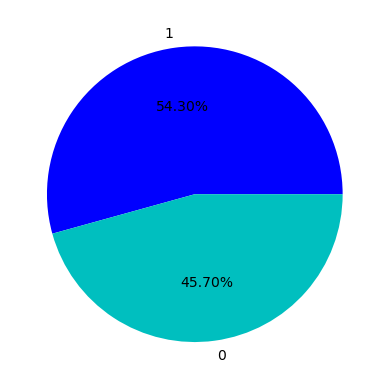

In [24]:
patient_counts = df["target"].value_counts()  #this show the counts of patients that have heart disease vs no heart disease

plt.pie(patient_counts, autopct="%1.2f%%", labels= patient_counts.index, colors= ["b", "c"])
plt.show()

#### How do average cholesterol (chol) and blood pressure (trestbps) differ between patients with and without heart disease?

In [25]:
df.groupby("target")[["trestbps","chol"]].agg([np.mean]).reset_index()

,target,trestbps,chol
,,mean,mean
0,0,134.398551,251.086957
1,1,129.250000,242.640244


In [26]:
import scipy         # T-test to show if the difference in mean is statistically significant
from scipy.stats import ttest_ind

grp_disease = df[df["target"] == 1]   #filtering the data to patient that are positive and negative
grp_no_disease = df[df["target"] == 0]

#T-test to show if the difference in mean is statistically significant
t_stat_bp, p_val_bp  = ttest_ind(grp_disease["trestbps"], grp_no_disease["trestbps"], equal_var= False)
print(f"trestbps = t_statistics: {round(t_stat_bp,3)}, p-value: {round(p_val_bp,7)}")

t_stat_chol, p_val_chol  = ttest_ind(grp_disease["chol"], grp_no_disease["chol"], equal_var= False)
print(f"chol = t_statistics: {round(t_stat_chol,3)}, p-value: {round(p_val_chol ,7)}")

trestbps = t_statistics: -2.529, p-value: 0.0119901
chol = t_statistics: -1.425, p-value: 0.1552756


- The P-values shows Difference in mean is statistically significant for both trestbps and chol, and they aint just gotten

In [27]:
df.shape

(302, 25)

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'trestbps_log',
       'chol_log', 'thalach_log', 'oldpeak_log', 'thal_log', 'trestbps_sqrt',
       'chol_sqrt', 'thalach_sqrt', 'oldpeak_sqrt', 'thal_sqrt', 'age_group'],
      dtype='object')

In [29]:
df.drop(columns=['thalach_log', 'thal_log', 'trestbps_sqrt','chol_sqrt', 
                 'thalach_sqrt', 'oldpeak_sqrt', 'thal_sqrt', 'age_group'], axis= 1, inplace= True)

### Correlation Matrix (Heatmap)

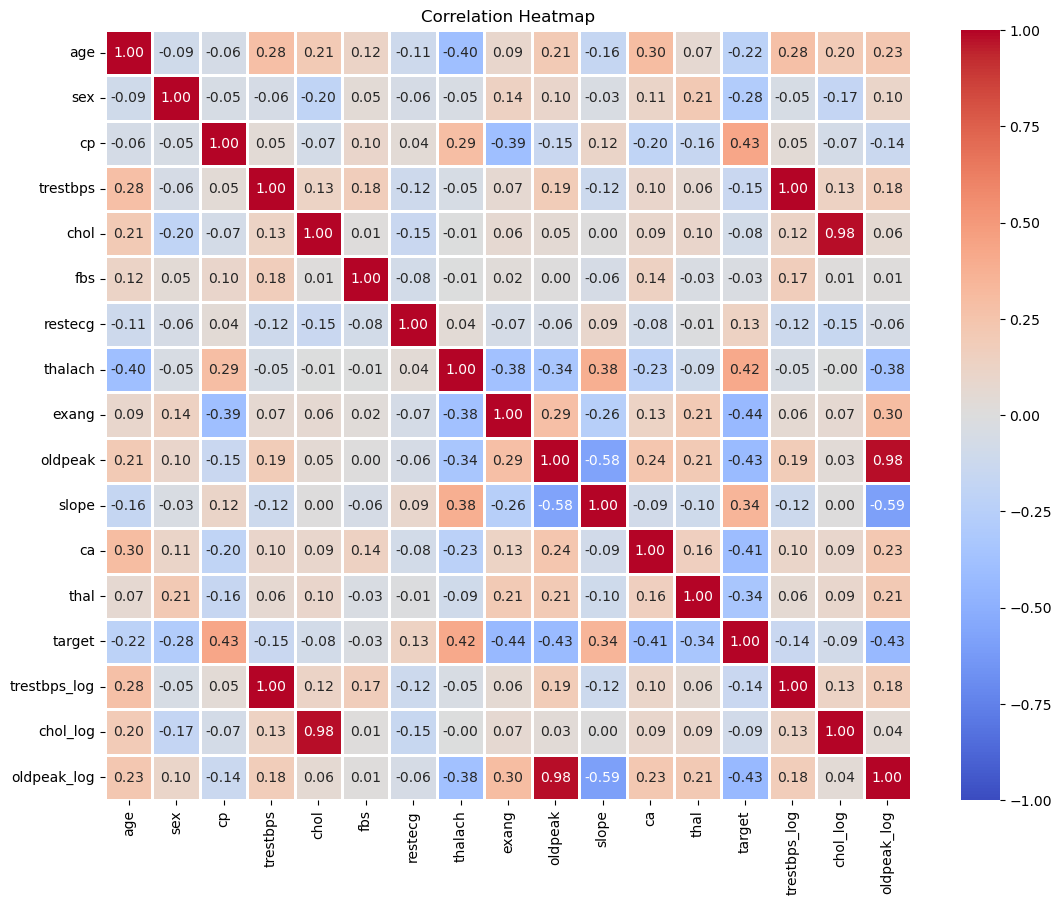

In [30]:
corr = df.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth= 1, fmt=".2f", vmin= -1)
plt.title("Correlation Heatmap")
plt.show()

### Save Cleaned Dataset

In [31]:
df.to_csv('C:/Users/DELL/Jupyter/Techcrush/Capstone/cleaned_heart.csv', index=False)

## Modelling

In [32]:
# Loading the cleaned dataset
data = pd.read_csv(r"cleaned_heart.csv")
display(data.head())
(data.shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_log,chol_log,oldpeak_log
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,4.836282,5.361292,1.098612
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,4.948760,5.318120,1.629241
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,4.983607,5.164786,1.526056
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,5.003946,5.318120,0.693147
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4.934474,5.686975,1.360977


(302, 17)

### X and y Split

In [33]:
X = data.drop(['trestbps', 'chol', 'oldpeak', 'target'], axis=1)
X.head()

,age,sex,cp,fbs,restecg,thalach,exang,slope,ca,thal,trestbps_log,chol_log,oldpeak_log
0,52,1,0,0,1,168,0,2,2,3,4.836282,5.361292,1.098612
1,53,1,0,1,0,155,1,0,0,3,4.948760,5.318120,1.629241
2,70,1,0,0,1,125,1,0,0,3,4.983607,5.164786,1.526056
3,61,1,0,0,1,161,0,2,1,3,5.003946,5.318120,0.693147
4,62,0,0,1,1,106,0,1,3,2,4.934474,5.686975,1.360977


In [34]:
y = data['target']
y.value_counts()

target
1    164
0    138
Name: count, dtype: int64

### Feature Scaling

In [35]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
X = pd.DataFrame(scaledX, columns=X.columns) # To save the array into a dataframe 
X.head()

,age,sex,cp,fbs,restecg,thalach,exang,slope,ca,thal,trestbps_log,chol_log,oldpeak_log
0,-0.267966,0.682656,-0.935208,-0.418446,0.901657,0.806035,-0.698344,0.979514,1.274980,1.119967,-0.330007,-0.640730,0.141377
1,-0.157260,0.682656,-0.935208,2.389793,-1.002541,0.237495,1.431958,-2.271182,-0.714911,1.119967,0.540763,-0.854331,1.682099
2,1.724733,0.682656,-0.935208,-0.418446,0.901657,-1.074521,1.431958,-2.271182,-0.714911,1.119967,0.810536,-1.612974,1.382496
3,0.728383,0.682656,-0.935208,-0.418446,0.901657,0.499898,-0.698344,0.979514,0.280034,1.119967,0.967999,-0.854331,-1.035925
4,0.839089,-1.464866,-0.935208,2.389793,0.901657,-1.905464,-0.698344,-0.645834,2.269926,-0.513994,0.430166,0.970635,0.903173


### Save Scaler

In [36]:
# Save scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

### Train-Test-Split

In [37]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # Checking the chape of each dataset

(241, 13) (61, 13) (241,) (61,)


### Training the Model

#### Logistic Regressor Model

In [38]:
# Initialize the Logistic Regression model and Fit the model to (X, y) train
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [39]:
# Predict on the train & test data
lg_preds_train = lg.predict(X_train)
lg_preds = lg.predict(X_test)
print(f"Predictions of Training set \n{classification_report(y_train, lg_preds_train)}\n") # For train data
print(f"Predictions of Test set \n{classification_report(y_test, lg_preds)}") # For test data

Predictions of Training set 
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       106
           1       0.85      0.91      0.88       135

    accuracy                           0.86       241
   macro avg       0.86      0.85      0.86       241
weighted avg       0.86      0.86      0.86       241


Predictions of Test set 
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.71      0.83      0.76        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



#### Decision Tree Model

In [40]:
# Initialize the Decision Tree model and fit to (X, y) train
tree = DecisionTreeClassifier(random_state= 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
# Predict on the train & test data
tree_preds_train = tree.predict(X_train)
tree_preds = tree.predict(X_test)
print(f"Predictions of Training set \n{classification_report(y_train, tree_preds_train)}\n") # For train data
print(f"Predictions of Test set \n{classification_report(y_test, tree_preds)}") # For test data

Predictions of Training set 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241


Predictions of Test set 
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.78      0.72      0.75        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



#### Gradient Boosting Model

In [42]:
# Initialize the Gradient Boosting model and fit to (X, y) train
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
# Predict on the Train & test data
gb_preds_train = gb.predict(X_train)
gb_preds = gb.predict(X_test)
print(f"Predictions of Training set \n{classification_report(y_train, gb_preds_train)}\n") # For train data
print(f"Predictions of Test set \n{classification_report(y_test, gb_preds)}") # For test data

Predictions of Training set 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241


Predictions of Test set 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



#### Random Forest Model

In [44]:
# Initialize the Random Forest model and fit to (X, y) train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Predict on the Train & test data
rf_preds_train = rf.predict(X_train)
rf_preds = rf.predict(X_test)
print(f"Predictions of Training set \n{classification_report(y_train, rf_preds_train)}\n") # For train data
print(f"Predictions of Test set \n{classification_report(y_test, rf_preds)}") # For test data

Predictions of Training set 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241


Predictions of Test set 
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### Cross Validation
- Prioritizing Acuracy as the scoring metrics 

In [46]:
models = {"Logistic Regression": lg,
         "Decision Tree": tree,
         "Gradient Boosting": gb,
         "Random Forest": rf}

result = {}

for name, models in models.items():
    models = cross_val_score(models, X, y, cv=5, scoring="accuracy")
    result[name] = {"Accuracy score": np.mean(models),
                   "Standard deviation": np.std(models)}
    
result_df = pd.DataFrame(result).T
result_df = result_df.sort_values(by = "Accuracy score", ascending= False)
print(result_df)

                     Accuracy score  Standard deviation
Random Forest              0.834262            0.061785
Logistic Regression        0.827869            0.056145
Gradient Boosting          0.801148            0.061879
Decision Tree              0.761585            0.039977


- Prioritising Recall as the scoring metrics

In [47]:
models = {"Logistic Regression": lg,
         "Decision Tree": tree,
         "Gradient Boosting": gb,
         "Random Forest": rf}

result = {}

for name, models in models.items():
    models = cross_val_score(models, X, y, cv=5, scoring="recall")
    result[name] = {"Recall": np.mean(models),
                   "Standard deviation": np.std(models)}

result_df = pd.DataFrame(result).T
result_df = result_df.sort_values(by = "Recall", ascending= False)
print(result_df)

                       Recall  Standard deviation
Logistic Regression  0.884659            0.064462
Random Forest        0.872159            0.064400
Gradient Boosting    0.847727            0.037757
Decision Tree        0.780492            0.035211


- After applying Cross validation on the models by prioritising **Accuracy** & **Recall**, we noticed that Random Forest gave the best accuracy score, whereas, Logistic Regresion gave the best score for recall.

- Since we are predicting Heart Disease, recall (sensitivity), will be priioritised because it has to do with the ability to catch as many true patients as possible which is usually more important.

- For this, we will look into analysing and fine-tuning both Logistion Regression and Random Forest model to identify which of the model gives us a far better result.

#### Confusion Matrix

- For both Random Forest and Logistic Regresion

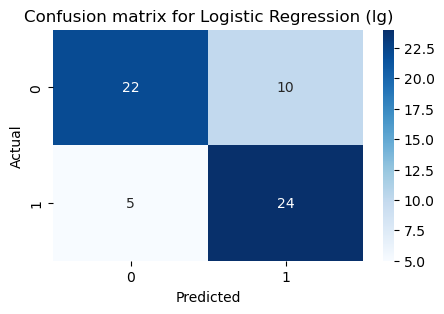

In [48]:
cm = confusion_matrix(y_test, lg_preds)

plt.figure(figsize= (5, 3))
sns.heatmap(cm, annot= True, cmap= "Blues")
plt.title("Confusion matrix for Logistic Regression (lg)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

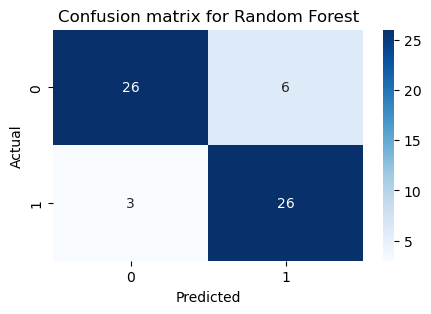

In [49]:
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize= (5, 3))
sns.heatmap(cm, annot= True, cmap= "Blues")
plt.title("Confusion matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

From the confusion matrix Logistic Regrssion (lg), we are having:
- 22 - True Negative (The number of patients without Heart Disease the model rightly predicted)
- 10 - False Positive (The number of patients without Heart Disease the model predicted as Heart Disease)
- 5 - False Negative (The number of patients with Heart Disease the model predicted as no Heart Disease)
- 24 - True Positive (The number of patients with Heart Disease the model rightly predicted)

From the confusion matrix for Random Forrest (rf), we are having:
- 26 - True Negative (The number of patients without Heart Disease the model rightly predicted)
- 6 - False Positive (The number of patients without Heart Disease the model predicted as Heart Disease)
- 3 - False Negative (The number of patients with Heart Disease the model predicted as no Heart Disease)
- 26 - True Positive (The number of patients with Heart Disease the model rightly predicted)

### Hyperparameter Tuning
- For Logistic Regression (lg)

In [50]:
# Define parameter grid
lg_params = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "solver": ['liblinear', 'saga'],
    "C": [0.01, 0.1, 1, 10, 100],
    "l1_ratio": [0, 0.5, 1]
}

scoring = {'accuracy': 'accuracy', 'precision': 'precision',
          'recall': 'recall', 'f1': 'f1'}

# GridSearchCV with 5-fold cross-validation
lg_grid = GridSearchCV(lg, lg_params, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, verbose=2)
lg_grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", lg_grid.best_params_)
print("Best CV Score:", lg_grid.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Best CV Score: 0.825765306122449


In [51]:
# Using the tuned model
lg_best = lg_grid.best_estimator_
lg_preds_train_tuned = lg_best.predict(X_train)
lg_preds_tuned = lg_best.predict(X_test)
print(f"Predictions of Training set \n{classification_report(y_train, lg_preds_train_tuned)}\n") # For train data
print(f"Predictions of Test set \n{classification_report(y_test, lg_preds_tuned)}") # For test data

Predictions of Training set 
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       106
           1       0.83      0.93      0.88       135

    accuracy                           0.85       241
   macro avg       0.86      0.85      0.85       241
weighted avg       0.86      0.85      0.85       241


Predictions of Test set 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



- For Random Forest (rf)

In [52]:
# Define parameter grid
rf_params = {
    "n_estimators": [100, 200, 300],        # number of trees
    "max_depth": [5, 10, 15, None],         # limit tree depth
    "min_samples_split": [2, 5, 10],        # minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],          # minimum samples per leaf
    "max_features": ["auto", "sqrt", "log2"] # features considered per split
}

# GridSearchCV with 5-fold cross-validation
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best CV Score:", rf_grid.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8259353741496598


In [53]:
# Using the tuned model
rf_best = rf_grid.best_estimator_
rf_preds_train_tuned = rf_best.predict(X_train)
rf_preds_tuned = rf_best.predict(X_test)
print(f"Predictions of Training set \n{classification_report(y_train, rf_preds_train_tuned)}\n") # For train data
print(f"Predictions of Test set \n{classification_report(y_test, rf_preds_tuned)}") # For test data

Predictions of Training set 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       106
           1       0.93      0.95      0.94       135

    accuracy                           0.93       241
   macro avg       0.93      0.93      0.93       241
weighted avg       0.93      0.93      0.93       241


Predictions of Test set 
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



### Compairing metrics of rf, tuned rf, lg, and tuned lg

In [54]:
# Random Forest
print(f"Predictions of Random Forest Test set \n{classification_report(y_test, rf_preds)}") # For rf test data
print(f"Predictions of Tuned Random Forest Test set \n{classification_report(y_test, rf_preds_tuned)}\n") # For tuned rf test data

# Logistic Regression
print(f"Predictions of Logistic Regression Test set \n{classification_report(y_test, lg_preds)}") # For lg test data
print(f"Predictions of Tuned Logistic Regression Test set \n{classification_report(y_test, lg_preds_tuned)}") # For tuned lg test data

Predictions of Random Forest Test set 
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Predictions of Tuned Random Forest Test set 
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


Predictions of Logistic Regression Test set 
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.71      0.83      0.76        29

    accuracy                           0.75        6

### Confusion matrix of tuned moodel (rf & lg)

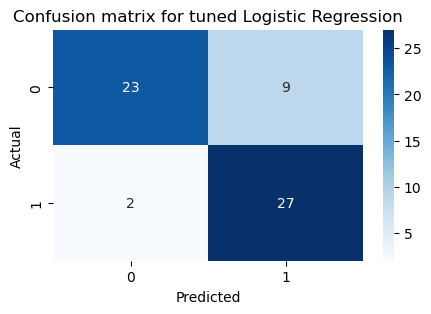

In [55]:
cm = confusion_matrix(y_test, lg_preds_tuned)

plt.figure(figsize= (5, 3))
sns.heatmap(cm, annot= True, cmap= "Blues")
plt.title("Confusion matrix for tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

| Model             | TN | FP | FN | TP | Accuracy              | Recall (Sensitivity) | Precision             |
| ----------------- | -- | -- | -- | -- | --------------------- | -------------------- | --------------------- |
| **LG**            | 22 | 10 | 5  | 24 | (22+24)/61 = **0.75** | 24/(24+5) = **0.83** | 24/(24+10) = **0.71** |
| **Tuned LG**      | 23 | 9  | 2  | 27 | (23+27)/61 = **0.82** | 27/(27+2) = **0.93** | 27/(27+9) = **0.75**  |

The tuned model performed better in every metric.
1. Logistic Regression (lg):
   - precision (71%), lower recall (83%)
   - false alarms (FP=10)
   - But misses 5 real cases (FN=5)
2. Tuned Logistic Regression (lg_best):
   - Slightly higher precision (75%), higher recall (93%)
   - One less false alarm (FP=9)
   - But only 2 false negatives (FN=2) — fewer missed patients

##### Note
We can say that the tuned model (lg_best) performed much better than the untuned model (lg) 

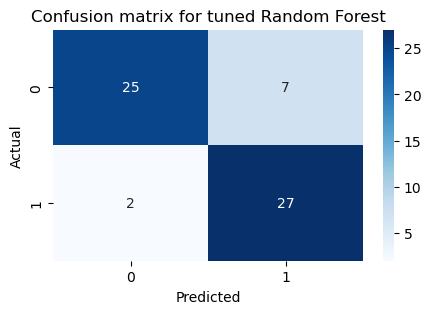

In [56]:
cm = confusion_matrix(y_test, rf_preds_tuned)

plt.figure(figsize= (5, 3))
sns.heatmap(cm, annot= True, cmap= "Blues")
plt.title("Confusion matrix for tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

| Model             | TN | FP | FN | TP | Accuracy              | Recall (Sensitivity) | Precision            |
| ----------------- | -- | -- | -- | -- | --------------------- | -------------------- | -------------------- |
| **RF**            | 26 | 6  | 3  | 26 | (26+26)/61 = **0.85** | 26/(26+3) = **0.90** | 26/(26+6) = **0.81** |
| **Tuned RF**      | 25 | 7  | 2  | 27 | (25+27)/61 = **0.85** | 27/(27+2) = **0.93** | 27/(27+7) = **0.79** |

Both models have the same accuracy (85%), but the way they make mistakes differs
1. Random Forest (rf):
   - Higher precision (81%), lower recall (90%)
   - Slightly fewer false alarms (FP=6)
   - But misses 3 real cases (FN=3)
2. Tuned Random Forest(rf_best):
   - Slightly lower precision (79%), higher recall (93%)
   - One more false alarm (FP=7) — a small cost
   - But only 2 false negatives (FN=2) — fewer missed patients

##### Note
We can say that the tuned model (rf_best) performed slightly better than the untuned model (rf) 

### Model Decision
Since we are predicting Heart Disease, recall (sensitivity) the ability to catch as many true patients as possible is usually more important (It’s safer to wrongly flag a healthy person (FP) than to miss a sick person (FN).

For that, we use the **Tuned Random Forest model (rf_best)** since it’s slightly better at detecting patients who truly have heart disease, which is the top priority in medical diagnostics, and it has a higher predictive accuracy than the tuned Logistic Regression model (lg_best).

## Explainable AI

In [57]:
# Initiallizing the SHAP model
shap.initjs()

In [58]:
# Since rf is our trained Random Forest model
explainer = shap.Explainer(rf_best, X_train) # Use training data for initialization

# Compute SHAP values for the test set
shap_values = explainer(X_test, check_additivity=False)

In [59]:
np.shape(shap_values.values)

(61, 13, 2)

In [60]:
# class index (0 or 1)
class_idx = 1

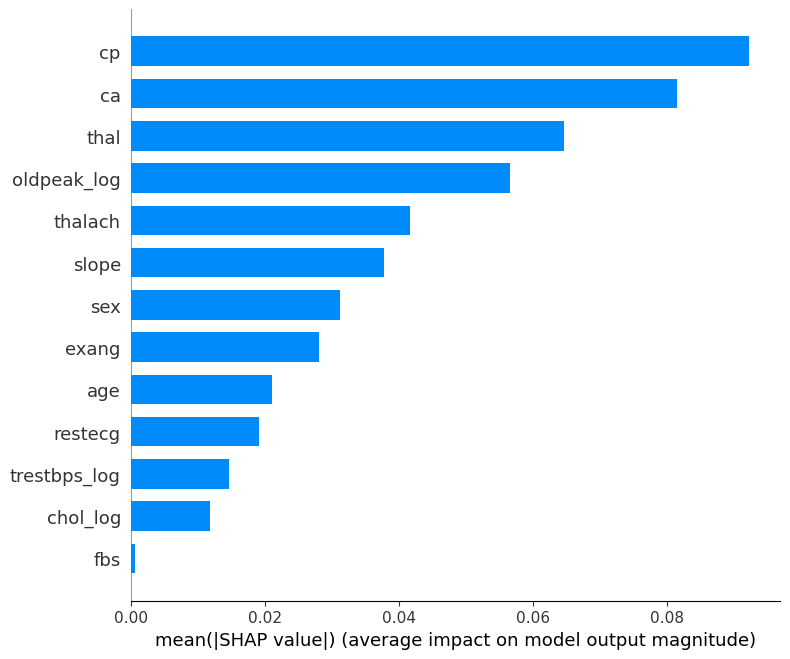

In [61]:
# Bar plot showing features with the strongest overall impact
shap.summary_plot(shap_values[:, :, class_idx], X_test, plot_type="bar", show=False)
plt.show()

##### Interpretation of SHAP Feature Importance Plot

The SHAP summary bar plot ranks features by their average impact (mean |SHAP value|) on the model’s output. The higher bars indicate features that contribute more strongly—positively or negatively—to the model’s prediction of heart disease.

###### Top Predictive Features
1. cp (Chest Pain Type)
    - The most influential feature overall.
   - Certain chest pain types (especially asymptomatic, cp=3) strongly increase the likelihood of heart disease.
   - This aligns with medical understanding: asymptomatic chest pain often indicates underlying cardiac abnormalities.
2. ca (Number of Major Vessels Colored by Fluoroscopy)
   - The second most important predictor.
   - Higher values of ca (more vessels narrowed/blocked) significantly raise heart disease risk.
3. thal (Thalassemia Test Result)
   - A measure from a blood disorder test used to detect abnormal heart conditions.
   - Abnormal thal results (e.g., “reversible defect”) are linked with poor cardiac function.
4. oldpeak_log (ST Depression Induced by Exercise, Log-Transformed)
   - Indicates changes in the ECG during exercise; higher values suggest ischemia (restricted blood flow).
   - The stronger this depression, the higher the model’s predicted probability of heart disease.
5. thalach (Maximum Heart Rate Achieved)
   - Inversely correlated — lower maximum heart rate tends to increase disease probability.
   - This reflects reduced cardiovascular efficiency.
6. slope (Slope of Peak Exercise ST Segment)
   - The shape of the ECG trace post-exercise. Flat or downsloping patterns are often associated with heart disease.

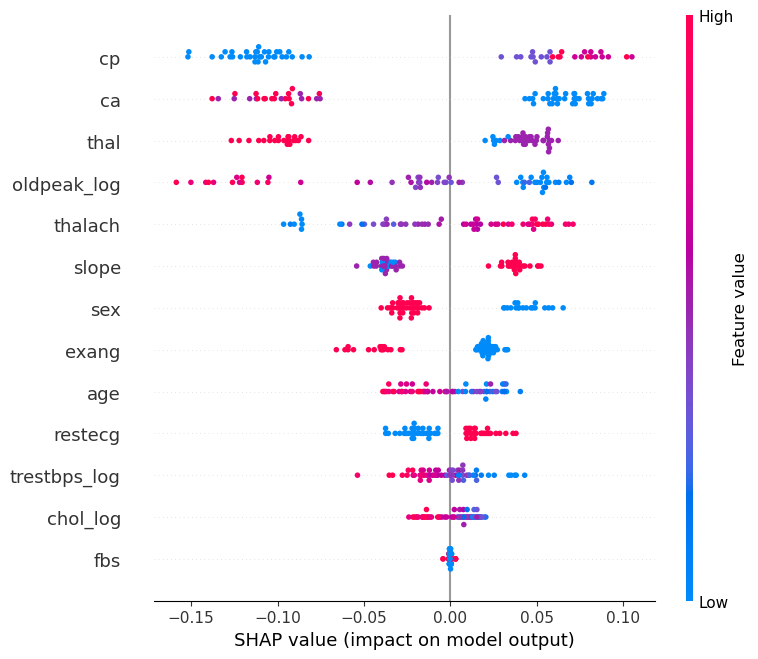

In [62]:
# Summary plot showing how each feature contributes overall to heart disease
shap.summary_plot(shap_values[:, :, class_idx], X_test, show= False)
plt.show()

| Feature     | High Value Effect | Low Value Effect | Interpretation                                 |
| ----------- | ----------------- | ---------------- | ---------------------------------------------- |
| cp          | ↑ risk            | ↓ risk           | Severe chest pain increases heart disease risk |
| ca          | ↓ risk            | ↑ risk           | More blocked vessels → higher risk             |
| thal        | ↑ risk            | ↓ risk           | Abnormal thalassemia → higher risk             |
| oldpeak_log | ↑ risk            | ↓ risk           | High ST depression → higher risk               |
| thalach     | ↓ risk            | ↑ risk           | Lower max heart rate → higher risk             |
| slope       | ↓ risk            | ↑ risk           | Down-sloping ST → higher risk                  |
| sex         | ↑ risk (male)     | ↓ risk (female)  | Males more likely to have heart disease        |
| exang       | ↑ risk            | ↓ risk           | Angina on exertion increases risk              |
| age         | ↑ risk            | ↓ risk           | Older age increases risk                       |


What This Plot Represents
- Each point represents a single patient (or observation) and shows how much each feature contributed to pushing the model’s prediction toward having heart disease (positive SHAP value) or not having heart disease (negative SHAP value).
- X-axis (SHAP value): Impact on the model output.
- Positive SHAP → feature pushes prediction toward heart disease present.
- Negative SHAP → feature pushes prediction toward heart disease absent.
- Color: The feature value (red = high, blue = low).
- Order (Y-axis): Features are ranked by importance (top = most impactful overall).

🔍 Feature-by-Feature Interpretation
The interpretation of the top features shown in your plot are:
1. cp (chest pain type)
    - One of the most influential features.
    - High cp values (red) → higher SHAP values → increase heart disease prediction.
    - Low cp values (blue) → lower SHAP values → decrease heart disease prediction.
    - Meaning: Patients with more severe chest pain types are more likely predicted to have heart disease.

2. ca (number of major vessels colored by fluoroscopy)
    - Low ca (blue) tends to push predictions toward heart disease (positive SHAP).
    - High ca (red) tends to reduce the likelihood (negative SHAP).
    - Meaning: More blocked vessels (low ca) correspond to higher disease risk.

3. thal (thalassemia)
    - High thal values (red) → higher SHAP values → increase heart disease risk.
    - Meaning: Abnormal thalassemia test results are strongly linked to heart disease.

4. oldpeak_log (ST depression induced by exercise)
    - High oldpeak (red) increases the chance of heart disease.
    - Meaning: Greater ST depression on ECG correlates with more heart problems.

5. thalach (maximum heart rate achieved)
    - High thalach (red) → lower SHAP values (less disease risk).
    - Low thalach (blue) → higher SHAP values (more disease risk).
    - Meaning: Lower max heart rate achieved indicates worse heart condition.

6. slope (slope of the peak exercise ST segment)
    - High slope (red) → negative SHAP values → less risk.
    - Low slope (blue) → positive SHAP values → higher risk.
    - Meaning: A down-sloping ST segment is more dangerous.

7. sex
    - High sex (red, usually male) → higher SHAP values → increased heart disease risk.
    - Meaning: Males are more likely to be predicted as having heart disease.

8. exang (exercise-induced angina)
    - High exang (red = yes) → positive SHAP → more risk.
    - Meaning: Exercise-induced angina increases the likelihood of heart disease.

9. age
    - Higher age (red) → slightly positive SHAP → more risk.
    - Meaning: Older age correlates with higher risk.

10. restecg, trestbps_log, chol_log, fbs
    - These features have smaller effects.
    - Their SHAP values cluster near zero, meaning they contribute less to predictions overall.

🧩 Key Insights
- Most important features: cp, ca, thal, and oldpeak_log dominate the model’s predictions.
- Protective factors: High thalach, high slope, and possibly low ca.
- Risk factors: High oldpeak_log, high thal, positive exang, male sex, and older age.

##  Save model

In [63]:
# Save the model
joblib.dump(rf_best, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

## Streamlit Link for Deployed Model
- https://heart-disease-app00.streamlit.app/